In [18]:
import sys
sys.path.append('../../../Scripts/')

In [19]:
import text_preprocessing as tp
import baseline_model as base
import plots as pl
import pandas as pd, numpy as np

In [20]:
path = '../Data/'

## Data

In [21]:
train = pd.read_csv(f'{path}train.csv')
test = pd.read_csv(f'{path}test.csv')

## Preprocessing

In [22]:
prep = tp.Preprocessing('english')

In [23]:
train_prep = prep.main_preprocess(train, 
                                column= 'sentence',
                                tweet = False,
                                tweet_tags = False,
                                remove_stop_words = True,
                                lemmatize = False,
                                translate_emojis = False,
                                whitelist = "")

In [24]:
test_prep = prep.main_preprocess(test, 
                                column= 'sentence',
                                tweet = False,
                                tweet_tags = False,
                                remove_stop_words = True,
                                lemmatize = False,
                                translate_emojis = False,
                                whitelist = "")

## Baseline

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [26]:
target_names = ['self-negative', 'self-positive', 'future-negative', 
                'future-positive', 'world-negative', 'world-positive']

seed = 42

### Logistic Regression

Model: Logistic Regression(Ngram: (1, 3), Min_df:3) --> Accuracy: 0.56


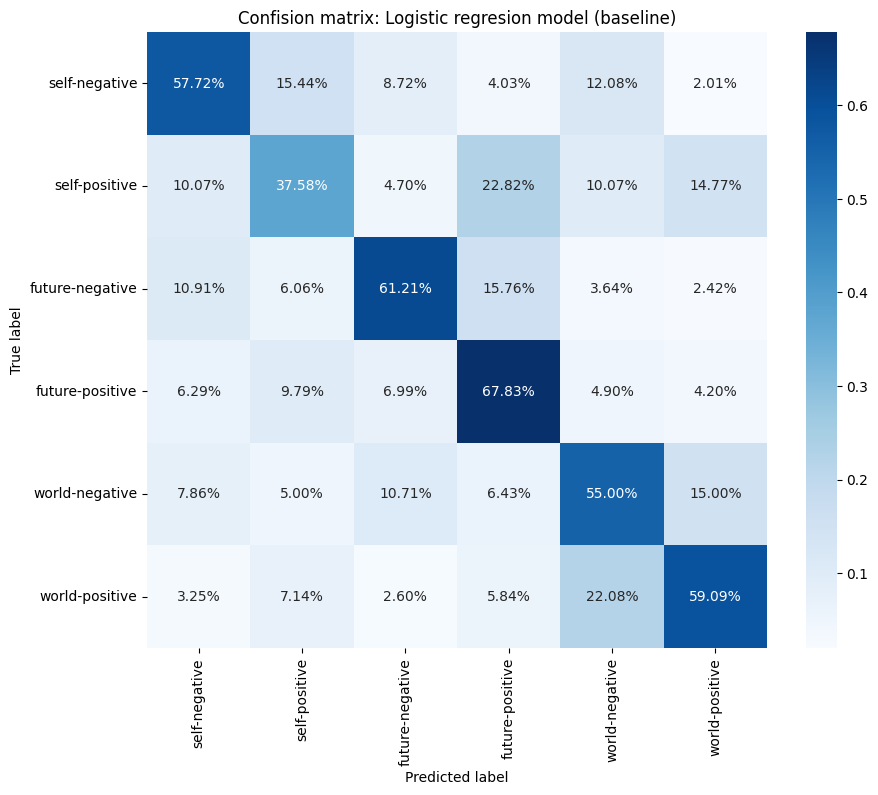

In [27]:
lr = LogisticRegression(random_state=seed)
b = base.Baseline(model=lr, 
                train_data=train_prep, 
                test_data=test_prep, 
                x_label_column='sentence', 
                y_label_column='label', 
                ngram_range=(1,3),
                min_df=3, 
                model_name='Logistic Regression', 
                target_names=target_names)

model_lr, vectorizer_lr, metrics_lr = b.baseline()

plot_lr = pl.Plots(metrics_lr)
plot_lr.plot_confusion_matrix(title='Confision matrix: Logistic regresion model (baseline)', 
                            x_label='Predicted label', 
                            y_label='True label', 
                            labels=target_names)


In [28]:
print(metrics_lr[0])


                 precision    recall  f1-score   support

  self-negative       0.60      0.58      0.59       149
  self-positive       0.46      0.38      0.41       149
future-negative       0.67      0.61      0.64       165
future-positive       0.54      0.68      0.60       143
 world-negative       0.49      0.55      0.52       140
 world-positive       0.62      0.59      0.60       154

       accuracy                           0.56       900
      macro avg       0.56      0.56      0.56       900
   weighted avg       0.57      0.56      0.56       900



### Random forest

Model: Random forest(Ngram: (1, 3), Min_df:3) --> Accuracy: 0.54


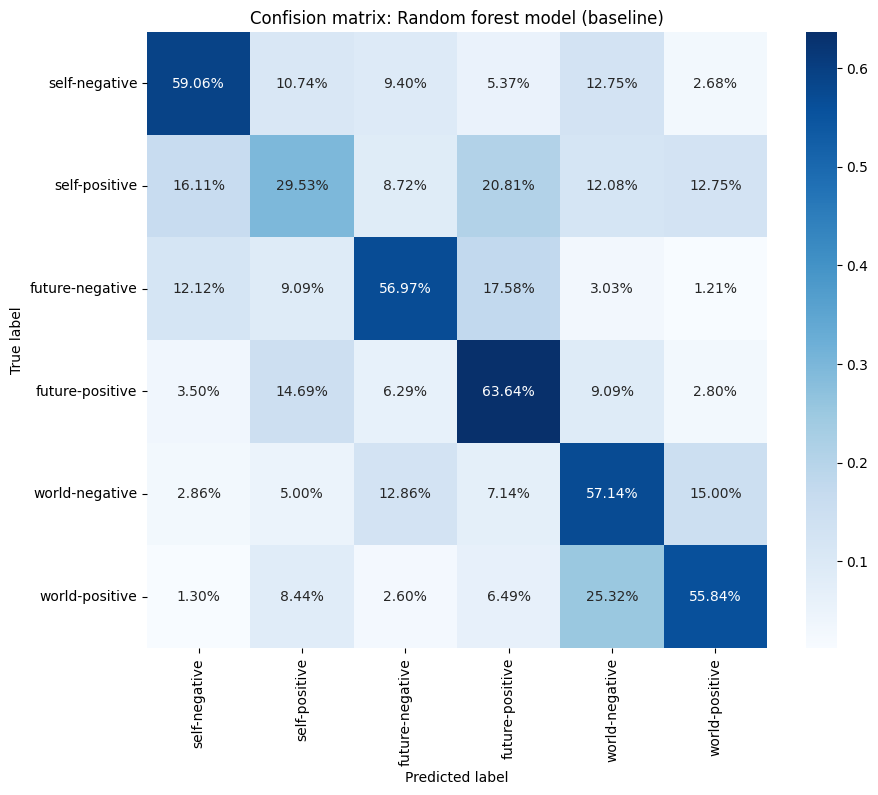

In [29]:
rf = RandomForestClassifier(random_state=seed)
b = base.Baseline(model=rf, 
                train_data=train_prep, 
                test_data=test_prep, 
                x_label_column='sentence', 
                y_label_column='label', 
                ngram_range=(1,3),
                min_df=3, 
                model_name='Random forest', 
                target_names=target_names)

model_rf, vectorizer_rf, metrics_rf = b.baseline()

plot_rf = pl.Plots(metrics_rf)
plot_rf.plot_confusion_matrix(title='Confision matrix: Random forest model (baseline)', 
                            x_label='Predicted label', 
                            y_label='True label', 
                            labels=target_names)


In [30]:
print(metrics_rf[0])

                 precision    recall  f1-score   support

  self-negative       0.62      0.59      0.60       149
  self-positive       0.38      0.30      0.33       149
future-negative       0.62      0.57      0.59       165
future-positive       0.51      0.64      0.57       143
 world-negative       0.46      0.57      0.51       140
 world-positive       0.63      0.56      0.59       154

       accuracy                           0.54       900
      macro avg       0.54      0.54      0.53       900
   weighted avg       0.54      0.54      0.53       900



### Decision tree

Model: Decision tree(Ngram: (1, 3), Min_df:3) --> Accuracy: 0.47


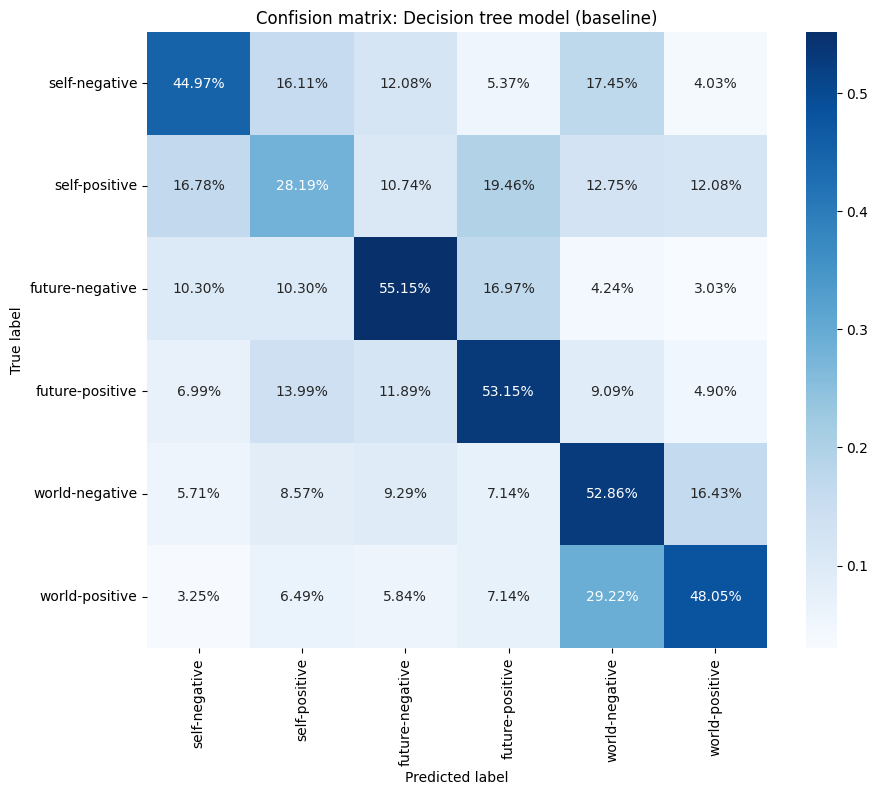

In [31]:
dt = DecisionTreeClassifier(random_state=seed)
b = base.Baseline(model=dt, 
                train_data=train_prep, 
                test_data=test_prep, 
                x_label_column='sentence', 
                y_label_column='label', 
                ngram_range=(1,3),
                min_df=3, 
                model_name='Decision tree', 
                target_names=target_names)

model_dt, vectorizer_dt, metrics_dt = b.baseline()

plot_dt = pl.Plots(metrics_dt)
plot_dt.plot_confusion_matrix(title='Confision matrix: Decision tree model (baseline)', 
                            x_label='Predicted label', 
                            y_label='True label', 
                            labels=target_names)


In [32]:
print(metrics_dt[0])

                 precision    recall  f1-score   support

  self-negative       0.51      0.45      0.48       149
  self-positive       0.34      0.28      0.31       149
future-negative       0.55      0.55      0.55       165
future-positive       0.47      0.53      0.50       143
 world-negative       0.40      0.53      0.46       140
 world-positive       0.56      0.48      0.52       154

       accuracy                           0.47       900
      macro avg       0.47      0.47      0.47       900
   weighted avg       0.47      0.47      0.47       900



### SVM

Model: SVM(Ngram: (1, 3), Min_df:3) --> Accuracy: 0.58


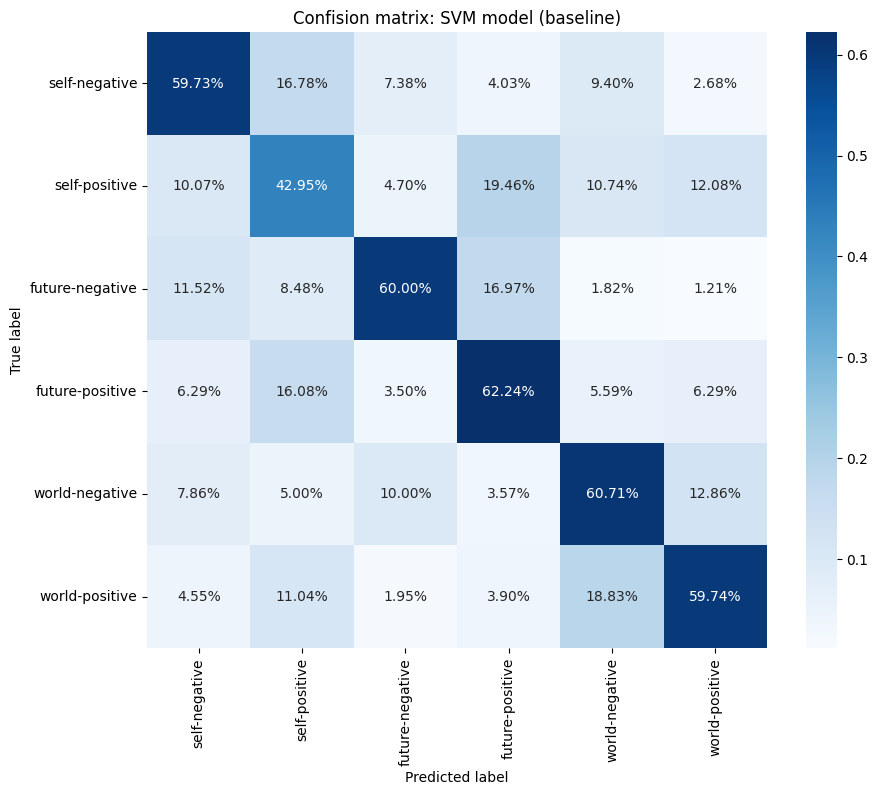

In [33]:
svm = SVC(random_state=seed)
b = base.Baseline(model=svm, 
                train_data=train_prep, 
                test_data=test_prep, 
                x_label_column='sentence', 
                y_label_column='label', 
                ngram_range=(1,3),
                min_df=3, 
                model_name='SVM', 
                target_names=target_names)

model_svm, vectorizer_svm, metrics_svm = b.baseline()

plot_svm = pl.Plots(metrics_svm)
plot_svm.plot_confusion_matrix(title='Confision matrix: SVM model (baseline)', 
                            x_label='Predicted label', 
                            y_label='True label', 
                            labels=target_names)

In [34]:
print(metrics_svm[0])

                 precision    recall  f1-score   support

  self-negative       0.59      0.60      0.60       149
  self-positive       0.43      0.43      0.43       149
future-negative       0.71      0.60      0.65       165
future-positive       0.55      0.62      0.58       143
 world-negative       0.55      0.61      0.58       140
 world-positive       0.64      0.60      0.62       154

       accuracy                           0.58       900
      macro avg       0.58      0.58      0.58       900
   weighted avg       0.58      0.58      0.58       900

